# Step 1 | Library & Configurations

## Importa varias librerías comunes para análisis de datos, estadística, visualización y procesamiento de texto

In [1]:
%%time

# Instalando bibliotecas seleccionadas:-
from gc import collect  # recolección de basura para liberar memoria
from warnings import filterwarnings  # manejar mensajes de advertencia

import re  # expresiones regulares

import numpy as np  # álgebra lineal
import pandas as pd  # procesamiento de datos, entrada/salida de archivos CSV (por ejemplo, pd.read_csv)
from scipy import stats  # funciones estadísticas

from itertools import cycle, combinations  # generar combinaciones y ciclos

import matplotlib.pyplot as plt  # visualización de datos
from matplotlib.ticker import FuncFormatter  # para formato personalizado de marcas en ejes
from matplotlib.ticker import FormatStrFormatter  # para formatear marcas en ejes con una cadena
from mpl_toolkits.mplot3d import Axes3D  # importar módulo de ejes 3D
from matplotlib.colors import ListedColormap  # importar mapa de colores para gráfico de dispersión
import seaborn as sns  # visualización estadística de datos
from wordcloud import WordCloud  # importar biblioteca WordCloud para visualización de datos textuales

from io import StringIO

filterwarnings('ignore')  # ignorar mensajes de advertencia
from IPython.display import display, HTML, display_html, clear_output  # para mostrar contenido HTML y limpiar salida

clear_output()
print()
collect()



CPU times: total: 609 ms
Wall time: 12.7 s


0

 ## Define constantes que representan códigos de escape ANSI para dar formato y color a texto que se imprime

In [2]:
class color:
    GRAY = '\033[90m'
    LIGHT_BLUE = '\033[94m'
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    BOLD = '\033[1m'
    RED = '\033[91m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    MAGENTA = '\033[95m'
    WHITE = '\033[97m'
    BLACK = '\033[30m'
    LIGHT_RED = '\033[91m'
    LIGHT_GREEN = '\033[92m'
    LIGHT_YELLOW = '\033[93m'
    LIGHT_BLUE = '\033[94m'
    LIGHT_MAGENTA = '\033[95m'
    LIGHT_CYAN = '\033[96m'
    LIGHT_WHITE = '\033[97m'
    RESET = '\033[0m'

global_style = {
    "background-color": "#ff4d4d",
    "color": "#e6e6ff",
    "border": "1.5px solid black",
    "font-weight": "bold"
}

In [3]:
# Configura el estilo del gráfico a 'fivethirtyeight'
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize":(10, 10)})
print(f"{color.GREEN}Succesfully Configured libraries!{color.END}")


Succesfully Configured libraries!


# Step 2 | Load Dataset

##  carga un archivo CSV protegiéndose contra errores comunes, especialmente el error de archivo no encontrado, y muestra mensajes coloridos según el resultado.

In [4]:
%%time

# Error Handling When Loading Dataset with Pandas read_csv

try:
    # Attempt to read the dataset
    df = pd.read_csv('global_ai_ml_data_salaries.csv')
    print(f"{color.GREEN}Dataset loaded successfully.{color.END}")
    
except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print(f"{color.RED}Error: File not found. Please check the file path.{color.END}")

except Exception as e:
    # Handle other exceptions
    print(f"{color.RED}An error occurred while loading the dataset: {e}{color.END}")

print(color.BLUE)
collect();

Dataset loaded successfully.

CPU times: total: 15.6 ms
Wall time: 65.6 ms


# Step 3 | Attribute Overview

In [5]:
from IPython.display import display, HTML
from io import StringIO
import pandas as pd

def display_dataframe_with_custom_header(df, show_head=False):
    # Define estilos globales CSS
    global_style = {
        "background-color": "#2e3440",
        "color": "#FFFF00",
        "border": "1.5px solid black",
        "font-weight": "bold",
        "font-family": "'Courier New', Courier, monospace"
    }

    # Encabezado personalizado simple (sin animaciones ni fuentes externas)
    if show_head:
        frame_type = "HEAD"
    else:
        frame_type = "INFORMATION"

    header_text = f"""
    <h2 style='color: #FF5733; font-weight: bold; font-family: sans-serif;'>
        DATAFRAME {frame_type}
    </h2><br>
    """

    if show_head:
        # Mostrar primeras filas del DataFrame
        df_to_display = df.head()
        df_html = df_to_display.to_html(index=False, classes='styled-table', header=True)

        styled_df = f'''
        <style>
        .styled-table {{
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 0.9em;
            font-family: sans-serif;
            min-width: 400px;
            box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        }}
        .styled-table thead th {{
            padding-top: 12px;
            padding-bottom: 12px;
            text-align: left;
            background-color: #2e3440;
            color: #81a1c1;
            border: 1px solid #ddd;
            font-weight: bold;
        }}
        .styled-table tbody td {{
            padding: 12px 15px;
            border: 1px solid #ddd;
        }}
        </style>
        {header_text}
        {df_html}
        '''
    else:
        # Mostrar información general del DataFrame con estilo
        info_output = StringIO()
        with pd.option_context('display.max_info_rows', 1000, 'display.max_info_columns', 1000):
            df.info(buf=info_output)

        info_string = info_output.getvalue()
        styled_df = f'''
        {header_text}
        <pre style="{"; ".join([f"{k}: {v}" for k, v in global_style.items()])};">
        {info_string}
        </pre>
        '''

    html_content = f'''
    <html>
    <head>
        <meta charset="UTF-8">
        <title>DataFrame Info</title>
    </head>
    <body>
        {styled_df}
    </body>
    </html>
    '''

    display(HTML(html_content))


## llamado a la  función reutilizable para mostrar: Las primeras filas del DataFrame (df.head()) O la información estructural (df.info()) con estilos CSS simples Usa HTML dentro de Jupyter para una visualización clara y estética.

In [6]:
display_dataframe_with_custom_header(df)  # Display info
display_dataframe_with_custom_header(df, show_head=True)  # Display head

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2024,SE,FT,Research Engineer,284900,USD,284900,US,0,US,M
2024,SE,FT,Research Engineer,161700,USD,161700,US,0,US,M
2024,MI,FT,Research Engineer,138000,USD,138000,US,0,US,M
2024,MI,FT,Research Engineer,86000,USD,86000,US,0,US,M
2024,SE,FT,Research Engineer,179000,USD,179000,US,0,US,M


# Step 4 | Missing Value Handling

In [7]:
def plot_missing_values_heatmap(df):
    # Calcular la suma de los valores nulos, excluyendo la primera columna
    missing_values_sum = df.isna().iloc[:, 1:].sum()

    # Crear una paleta de colores personalizada
    custom_palette = sns.color_palette("colorblind", as_cmap=True)  # Paleta de ejemplo, puedes usar otra

    # Crear un gráfico de mapa de calor (heatmap)
    plt.figure(figsize=(22, 4), facecolor='silver')
    ax = sns.heatmap(
        missing_values_sum.to_frame(name='').T.rename(columns=lambda x: x.replace('_', ' ').title()), 
        cmap=custom_palette,  # Usar la paleta definida
        annot=True,           # Mostrar valores encima del gráfico
        fmt='0.0f',           # Formato numérico sin decimales
        annot_kws={"fontsize": 30, "fontweight": "bold"},  # Tamaño y estilo del texto anotado
        linecolor='black', linewidth=2  # Color y grosor de líneas de celda
    )

    # Establecer el título del gráfico
    plt.title(
        'Conteo de Valores Faltantes',
        pad=20, fontsize=18,
        color='#FF5733',
        fontname='Calibri',
        fontweight='bold'
    )

    # Rotar las etiquetas del eje X
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=15, fontweight='bold')

    # Estilo de etiquetas del eje Y
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, fontweight='bold')

    # Mostrar el gráfico
    plt.show()


## Grafica un mapa de calor (heatmap) que muestra cuántos valores nulos hay en cada columna del DataFrame (excepto la primera columna).Usa seaborn para generar el gráfico, aplicando colores, bordes, rotación y anotaciones con estilo.

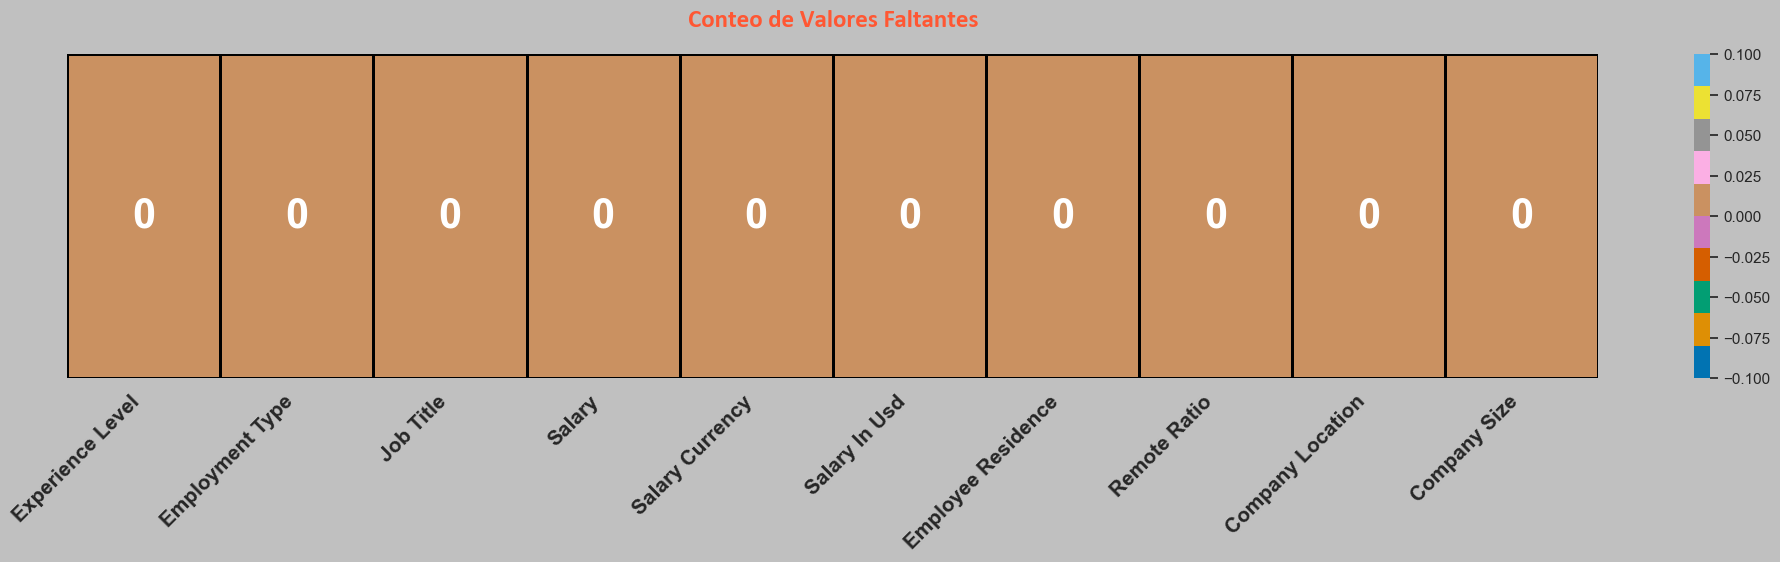

In [8]:
plot_missing_values_heatmap(df)

# Step 5 | Duplicate Value Manage

## Revisa todas las filas del DataFrame df y cuenta cuántas están duplicadas (es decir, filas que ya existen exactamente igual en otra parte del DataFrame).

In [9]:
# Verificar los valores duplicados en los datos
duplicate_values = df.duplicated().sum()
print(color.BLUE + f'El conjunto de datos contiene {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}valores duplicados')

# Eliminar filas duplicadas
df_no_duplicates = df.drop_duplicates()


El conjunto de datos contiene 8668 valores duplicados


## detectar columnas duplicadas en un DataFrame df y resaltarlas visualmente con estilos (colores y tamaño de fuente) usando pandas Styler

In [10]:
# Crear diccionario: True si la columna TIENE duplicados, False si NO tiene
tiene_duplicados = {
    columna: df[columna].duplicated().sum() > 0
    for columna in df.columns
}

# Convertir a DataFrame
df_tiene_duplicados = pd.DataFrame.from_dict(tiene_duplicados, orient='index', columns=['¿Tiene duplicados?'])

# Mostrar como tabla estilizada con colores (rojo si tiene duplicados = True, verde si no tiene = False)
df_tiene_duplicados.style.applymap(lambda x: 'color:green ' if x else 'color: red')

,¿Tiene duplicados?
work_year,True
experience_level,True
employment_type,True
job_title,True
salary,True
salary_currency,True
salary_in_usd,True
employee_residence,True
remote_ratio,True
company_location,True


#

In [11]:
def calculate_statistics(df, opacity=0.5, font_size='17px'):
    # Filter numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    stat = pd.DataFrame()  # Initialize an empty dataframe

    # Measure of central tendency
    stat['Mean'] = numeric_df.mean()  # for mean of all columns
    stat['Median'] = numeric_df.median()  # for median of all columns
    stat['Mode'] = numeric_df.mode().iloc[0]  # for mode of all columns

    # Measure of dispersion
    stat['Range'] = (numeric_df.max() - numeric_df.min())
    stat['Stdev'] = numeric_df.std()
    stat['Variance'] = numeric_df.var()

    # Interquartile range
    stat['IQR'] = [stats.iqr(numeric_df[i]) for i in numeric_df.columns]

    # Quantiles
    stat['25%'] = numeric_df.quantile(q=0.25, axis=0)
    stat['50%'] = numeric_df.quantile(q=0.50, axis=0)
    stat['75%'] = numeric_df.quantile(q=0.75, axis=0)

    # Minimum and maximum
    stat['Min'] = numeric_df.min()
    stat['Max'] = numeric_df.max()

    # Skewness and Kurtosis
    stat['Skewness'] = numeric_df.skew()
    stat['Kurtosis'] = numeric_df.kurt()

    # Transpose the DataFrame
    stat = stat.T

    # Apply the float format
    stat = stat.applymap('{:,.2f}'.format)

    # Apply the background color with transparency
    styled_df = stat.style.apply(lambda x: [f'background: rgba(173, 216, 230, {opacity})' for val in x], axis=1)
    
    # Apply font size
    styled_df = styled_df.set_properties(**{'font-size': font_size})
    
    return styled_df

## Esta función calcula un conjunto completo de estadísticas descriptivas para las columnas numéricas de un DataFrame df, y devuelve una tabla visualmente estilizada con los resultados

In [12]:
# Ejemplo de uso:
# Suponiendo que tienes un DataFrame llamado 'df' y quieres establecer la transparencia en 0.5
stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')
stats_df

,work_year,salary,salary_in_usd,remote_ratio
Mean,"2,023.38","162,503.52","151,029.73",29.43
Median,"2,023.00","143,000.00","142,200.00",0.00
Mode,"2,024.00","100,000.00","150,000.00",0.00
Range,4.00,"30,386,000.00","785,000.00",100.00
Stdev,0.71,"307,049.72","68,579.48",45.23
Variance,0.50,"94,279,528,420.23","4,703,144,919.03","2,046.06"
IQR,1.00,"86,500.00","86,750.00",100.00
25%,"2,023.00","103,500.00","103,000.00",0.00
50%,"2,023.00","143,000.00","142,200.00",0.00
75%,"2,024.00","190,000.00","189,750.00",100.00


In [13]:
def variable_summary(df, opacity=0.5, font_size='20px'):
    # Initialize an empty list to store individual summaries
    summaries = []

    # Iterate through each column in the DataFrame
    for col in df.columns:
        dtype = df[col].dtype  # Data type of the column
        count = df[col].count()  # Count of non-null values
        unique = df[col].nunique()  # Number of unique values
        missing = df[col].isna().sum()  # Number of missing values

        # Append the summary information to the list
        summaries.append([col, dtype, count, unique, missing])

    # Create a DataFrame from the list of summaries
    summary_df = pd.DataFrame(summaries, columns=['Variable', 'Dtype', 'Count', 'Unique', 'Missing'])

    # Apply background color with opacity
    styled_summary_df = summary_df.style.apply(lambda x: [f'background: rgba(42, 46, 120, {opacity})' for val in x], axis=1)

    # Apply font size to the entire DataFrame
    styled_summary_df.set_table_styles([{'selector': '', 'props': [('font-size', font_size)]}])

    return styled_summary_df

### genera un resumen estructurado de cada columna del DataFrame df, incluyendo su tipo de dato, cantidad de valores no nulos, valores únicos y valores faltantes (missing).Devuelve una versión estilizada visualment

In [14]:

summary_df = variable_summary(df)
summary_df

,Variable,Dtype,Count,Unique,Missing
0,work_year,int64,20565,5,0
1,experience_level,object,20565,4,0
2,employment_type,object,20565,4,0
3,job_title,object,20565,153,0
4,salary,int64,20565,3023,0
5,salary_currency,object,20565,24,0
6,salary_in_usd,int64,20565,3424,0
7,employee_residence,object,20565,88,0
8,remote_ratio,int64,20565,3,0
9,company_location,object,20565,78,0
